In [9]:
!pip list | grep torch

torch                        2.2.1


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/var/folders/6y/1mvv2b0x52l8kq6d_yqmgw9c0000gn/T/ipykernel_25724/3486776668.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                 sep=' ', skipinitialspace=True)
df.dataframeName = 'auto-mpg.csv'

In [3]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 398 rows and 8 columns


<Axes: >

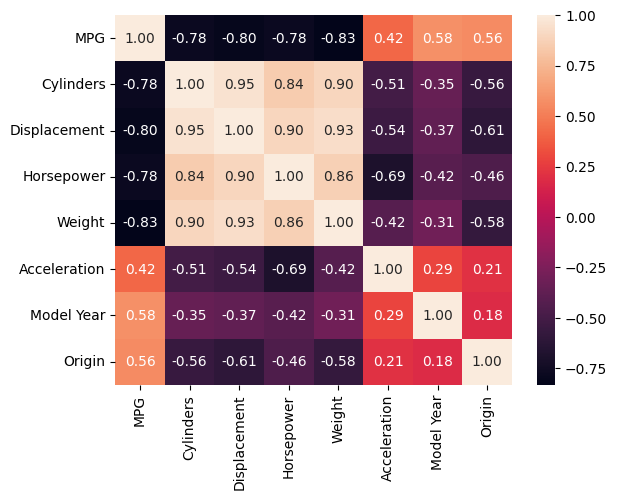

In [4]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

<Axes: >

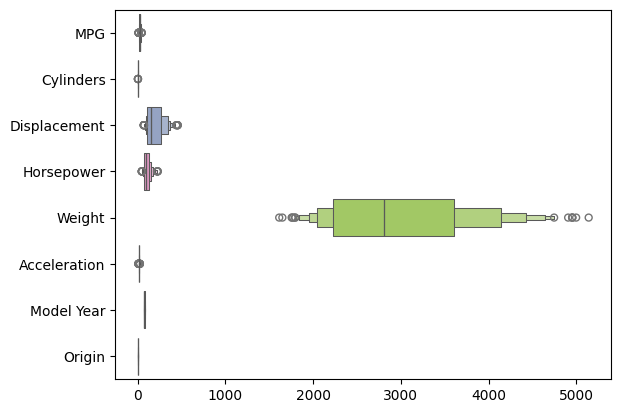

In [5]:
sns.boxenplot(data=df, orient="h", palette="Set2")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
# Drop missing values
df = df.dropna()

In [19]:
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
tartget = 'MPG'

X = df[features] 
# X = df.iloc[:, 1:7], X = df.drop('MPG', axis=1)
y = df[tartget]

In [13]:
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70
3,8,304.0,150.0,3433.0,12.0,70
4,8,302.0,140.0,3449.0,10.5,70


In [15]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64

In [16]:
import torch

In [20]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [27]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [60]:
torch.manual_seed(0)
model = LinearRegression(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-5)
losses = []
# optimizer = optim.SGD(model.parameters(), lr=1e-8 + 5e-9)

# training
n_epochs = 450
for epoch in range(n_epochs):
    model.train()
    for X, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    
    print(f'epoch: {epoch}, loss: {loss.item()}')

epoch: 0, loss: 390663.28125
epoch: 1, loss: 93026.1953125
epoch: 2, loss: 6474.08251953125
epoch: 3, loss: 3620.75048828125
epoch: 4, loss: 3952.06396484375
epoch: 5, loss: 1690.5362548828125
epoch: 6, loss: 731.8101806640625
epoch: 7, loss: 1042.1441650390625
epoch: 8, loss: 1074.3992919921875
epoch: 9, loss: 360.8616638183594
epoch: 10, loss: 683.254150390625
epoch: 11, loss: 812.2744140625
epoch: 12, loss: 726.0695190429688
epoch: 13, loss: 592.2923583984375
epoch: 14, loss: 712.990234375
epoch: 15, loss: 769.0966796875
epoch: 16, loss: 514.7241821289062
epoch: 17, loss: 583.3880615234375
epoch: 18, loss: 630.0590209960938
epoch: 19, loss: 445.21923828125
epoch: 20, loss: 549.8585205078125
epoch: 21, loss: 515.9010620117188
epoch: 22, loss: 466.38739013671875
epoch: 23, loss: 549.9840698242188
epoch: 24, loss: 849.5333862304688
epoch: 25, loss: 637.4111938476562
epoch: 26, loss: 481.398193359375
epoch: 27, loss: 379.118896484375
epoch: 28, loss: 544.8668823242188
epoch: 29, loss: 4

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
with torch.no_grad():
    y_pred = model(torch.tensor(X_test, dtype=torch.float32))
    mse_loss = mean_squared_error(y_test, y_pred)
    mae_loss = mean_absolute_error(y_test, y_pred)
    print(f'Test MSE: {mse_loss:.4f}, Test MAE: {mae_loss:.4f}')

Test MSE: 68.8992, Test MAE: 6.7422


/var/folders/6y/1mvv2b0x52l8kq6d_yqmgw9c0000gn/T/ipykernel_25724/104943276.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = model(torch.tensor(X_test, dtype=torch.float32))


In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [64]:
mean_squared_error(y_test, y_pred)

10.502362

In [65]:
mean_absolute_error(y_test, y_pred)

2.5038588

In [66]:
r2_score(y_test, y_pred)

0.7942350680738604